In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster


In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
# Step 1: Collecting Data
# Loading data from a CSV file
file_path = 'ev-charging-stations-india.csv'  # replace with your file path
df = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(df.head())

                                                name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751    76.2760   
3  Fun and Food Carnival, NH 58, Khatauli Bypass,...   29.3105    77.7218   
4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   29.3105    77.7218   

   type  
0  12.0  
1  12.0  
2  12.0  
3  12.0  


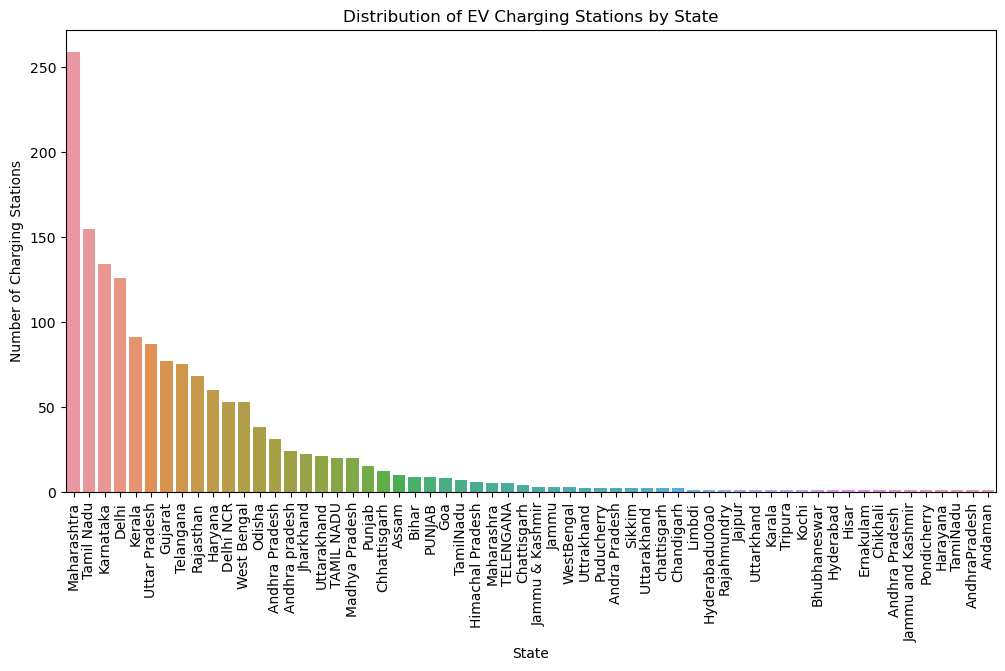

In [5]:
# Geographical distribution of charging stations by state
state_distribution = df['state'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=state_distribution.index, y=state_distribution.values)
plt.title('Distribution of EV Charging Stations by State')
plt.xlabel('State')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=90)
plt.show()

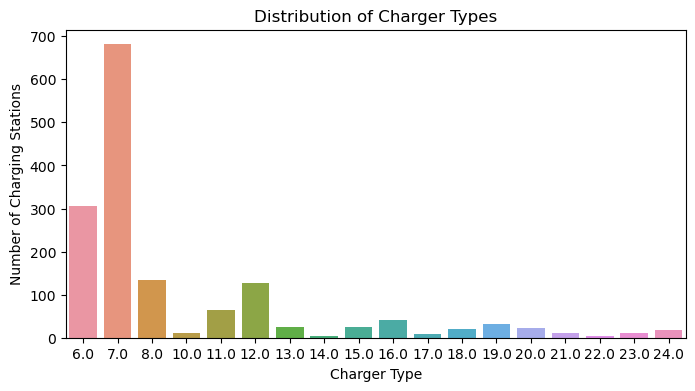

In [6]:
# Distribution of charger types
type_distribution = df['type'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=type_distribution.index, y=type_distribution.values)
plt.title('Distribution of Charger Types')
plt.xlabel('Charger Type')
plt.ylabel('Number of Charging Stations')
plt.show()

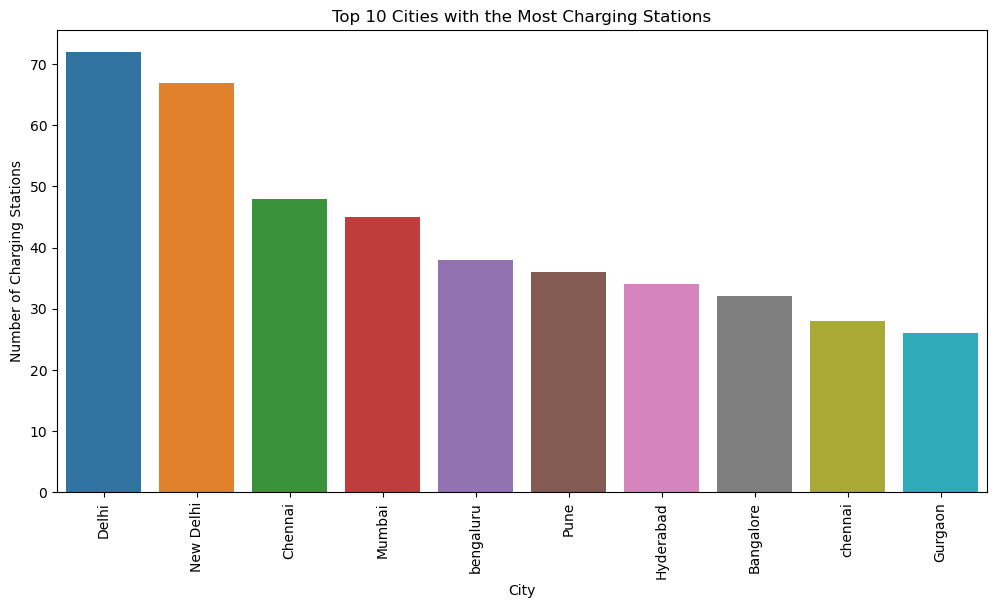

In [7]:
# Charging stations density by city
city_distribution = df['city'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values)
plt.title('Top 10 Cities with the Most Charging Stations')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=90)
plt.show()

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample main dataset
main_data = {
    'name': ['IOCL Rajokri Station', 'Ampa Skywalk', 'Evershine Mall Charging Station', 'BESCOM HSR Layout', 'Inspacco Circle Station'],
    'state': ['Delhi', 'Telangana', 'Maharashtra', 'Karnataka', 'Maharashtra'],
    'city': ['New Delhi', 'chennai', 'Mumbai', 'Bengaluru', 'Pune'],
    'lattitude': [12.9716, 13.0827, 12.2958, 12.9716, 13.0827],
    'longitude': [77.5946, 80.2707, 76.6394, 77.5946, 80.2707],
    'type': ['7', '14', '5', '6', '15']
}
df = pd.DataFrame(main_data)

# Sample usage dataset
usage_data = {
    'station_id': ['IOCL Rajokri Station', 'Ampa Skywalk', 'Evershine Mall Charging Station', 'BESCOM HSR Layout', 'Inspacco Circle Station'],
    'sessions': [100, 150, 120, 80, 200],
    'duration': [500, 700, 600, 400, 900],  # in hours
    'energy_dispensed': [1000, 1500, 1200, 800, 1800]  # in kWh
}
usage_df = pd.DataFrame(usage_data)

# Display the usage and main datasets
print("Usage DataFrame:")
print(usage_df)
print("\nMain DataFrame:")
print(df)


Usage DataFrame:
                        station_id  sessions  duration  energy_dispensed
0             IOCL Rajokri Station       100       500              1000
1                     Ampa Skywalk       150       700              1500
2  Evershine Mall Charging Station       120       600              1200
3                BESCOM HSR Layout        80       400               800
4          Inspacco Circle Station       200       900              1800

Main DataFrame:
                              name        state       city  lattitude  \
0             IOCL Rajokri Station        Delhi  New Delhi    12.9716   
1                     Ampa Skywalk    Telangana    chennai    13.0827   
2  Evershine Mall Charging Station  Maharashtra     Mumbai    12.2958   
3                BESCOM HSR Layout    Karnataka  Bengaluru    12.9716   
4          Inspacco Circle Station  Maharashtra       Pune    13.0827   

   longitude type  
0    77.5946    7  
1    80.2707   14  
2    76.6394    5  
3    77.5

In [62]:
# Merge with the main dataset to get station details
merged_df = pd.merge(df, usage_df, left_on='name', right_on='station_id')

# Display the merged dataset
print("\nMerged DataFrame:")
print(merged_df)



Merged DataFrame:
                              name        state       city  lattitude  \
0             IOCL Rajokri Station        Delhi  New Delhi    12.9716   
1                     Ampa Skywalk    Telangana    chennai    13.0827   
2  Evershine Mall Charging Station  Maharashtra     Mumbai    12.2958   
3                BESCOM HSR Layout    Karnataka  Bengaluru    12.9716   
4          Inspacco Circle Station  Maharashtra       Pune    13.0827   

   longitude type                       station_id  sessions  duration  \
0    77.5946    7             IOCL Rajokri Station       100       500   
1    80.2707   14                     Ampa Skywalk       150       700   
2    76.6394    5  Evershine Mall Charging Station       120       600   
3    77.5946    6                BESCOM HSR Layout        80       400   
4    80.2707   15          Inspacco Circle Station       200       900   

   energy_dispensed  
0              1000  
1              1500  
2              1200  
3        

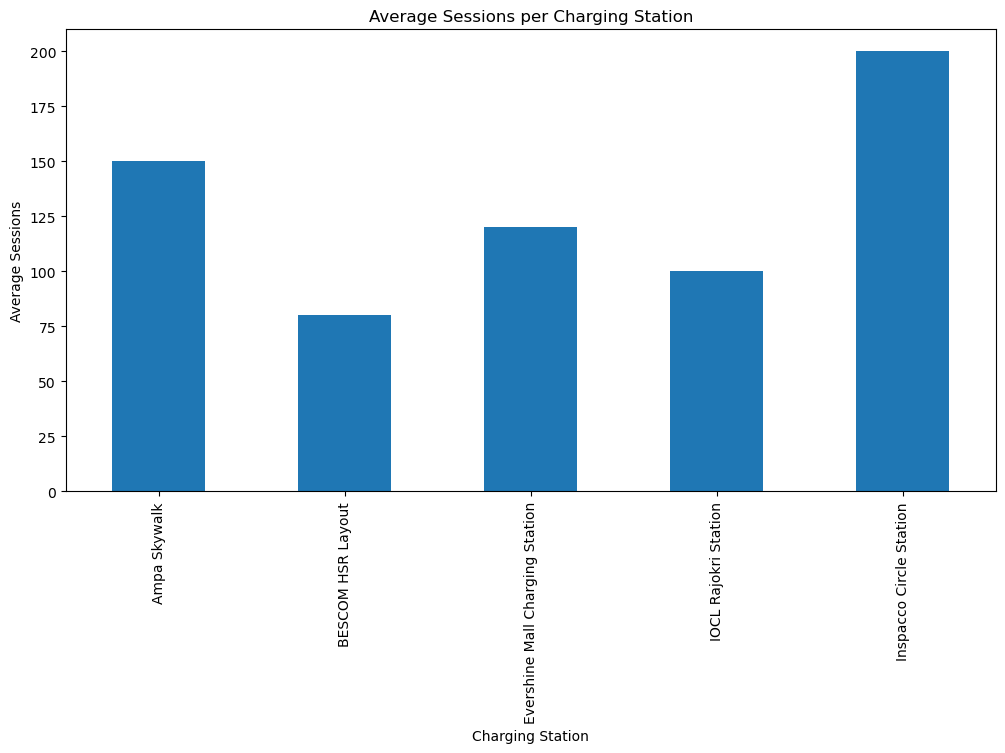

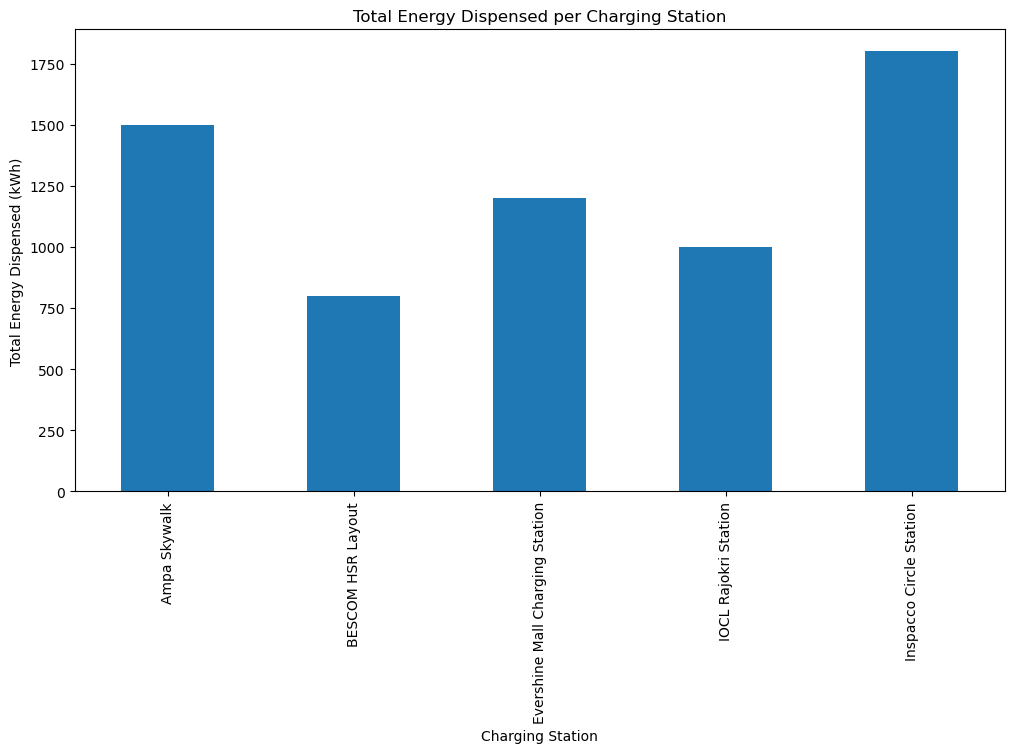

In [63]:
# Calculate average sessions per station
average_sessions = merged_df.groupby('name')['sessions'].mean()
plt.figure(figsize=(12, 6))
average_sessions.plot(kind='bar')
plt.title('Average Sessions per Charging Station')
plt.xlabel('Charging Station')
plt.ylabel('Average Sessions')
plt.xticks(rotation=90)
plt.show()

# Calculate total energy dispensed per station
total_energy_dispensed = merged_df.groupby('name')['energy_dispensed'].sum()
plt.figure(figsize=(12, 6))
total_energy_dispensed.plot(kind='bar')
plt.title('Total Energy Dispensed per Charging Station')
plt.xlabel('Charging Station')
plt.ylabel('Total Energy Dispensed (kWh)')
plt.xticks(rotation=90)
plt.show()


In [64]:
# Define emission reduction factor (e.g., kg CO2 per kWh)
emission_reduction_factor = 0.2

# Calculate total emissions reduced
merged_df['emissions_reduced'] = merged_df['energy_dispensed'] * emission_reduction_factor
total_emissions_reduced = merged_df['emissions_reduced'].sum()
print(f'Total emissions reduced: {total_emissions_reduced:.2f} kg CO2')


Total emissions reduced: 1260.00 kg CO2
